In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 
from torch.utils.data import DataLoader, random_split
import torchvision.datasets as datasets
import torchvision.transforms as transforms 
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split 

from Pytorch_Build_Custom_Datasets_for_Images import CatsAndDogsDataset


current_directory = r'/home/toe/Documents/Aladdin_Persson_Pytorch_Serie/07_Pytorch_How_to_build_custom_Datasets_for_Images'

# def load_checkpoint(checkpoint): 
#     print('--> Loading Checkpoint')
#     model.load_state_dict(checkpoint['state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer']) 


# Set device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 32
in_channels = 3
num_classes = 2 
learning_rate = 0.0005
batch_size = 1024
epochs = 31
load_model = True

# Datasets
dataset = CatsAndDogsDataset(csv_file='/home/toe/Documents/Aladdin_Persson_Pytorch_Serie/07_Pytorch_How_to_build_custom_Datasets_for_Images/dataset/data.csv', 
                             root_dir='/home/toe/Documents/Aladdin_Persson_Pytorch_Serie/07_Pytorch_How_to_build_custom_Datasets_for_Images/dataset/catsanddogs',
                             transform=transforms.ToTensor())

dataset_length = len(dataset) 
train_length = int(dataset_length*0.8)
test_length = int(dataset_length*0.2) + 1 

train_set, test_set = random_split(dataset, [train_length, test_length]) 
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

import sys
print(train_set) 

In [2]:
class CNN(nn.Module): 
    def __init__(self, in_channels, num_classes): 
        super(CNN, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels, out_channels=32, kernel_size=(3,3), padding=(1,1), stride=(1,1))
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)) 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3), padding=(1,1), stride=(1,1))
        self.fc1 = nn.Linear(in_features=32*16*16, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x) : 
        x = F.relu(self.conv1(x))  
        x = F.relu(self.conv2(x)) 
        x = self.pool(x) 
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x 

model = CNN(in_channels, num_classes).to(device=device) 

criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 

for epoch in range(epochs): 
    print(f'Epoch: {epoch}') 
    losses = [] 

    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)): 
        data = data.to(device=device) 
        targets = targets.to(device=device)

        # Forward
        scores = model(data) 
        loss = criterion(scores,targets)
        losses.append(loss.item()) 

        # Backward 
        optimizer.zero_grad() 
        loss.backward() 

        optimizer.step() 
    
    mean_loss = sum(losses)/len(losses) 

    print(f'Loss at epoch {epoch} was {mean_loss:.5f}') 
def check_accurancy(loader, model) : 
    
    num_correct = 0 
    num_samples = 0 
    model.eval() 

    with torch.no_grad() : 
        for x, y in loader : 
            x = x.to(device= device)
            y = y.to(device= device)

            scores = model(x) 
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}%')

    model.train() 

check_accurancy(train_loader, model)
check_accurancy(test_loader, model)



Epoch: 0


  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:13<00:00,  1.86s/it]


Loss at epoch 0 was 0.81867
Epoch: 1


100%|██████████| 7/7 [00:15<00:00,  2.24s/it]


Loss at epoch 1 was 0.69980
Epoch: 2


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]


Loss at epoch 2 was 0.69783
Epoch: 3


100%|██████████| 7/7 [00:10<00:00,  1.51s/it]


Loss at epoch 3 was 0.69060
Epoch: 4


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Loss at epoch 4 was 0.68653
Epoch: 5


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Loss at epoch 5 was 0.67791
Epoch: 6


100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Loss at epoch 6 was 0.66557
Epoch: 7


100%|██████████| 7/7 [00:15<00:00,  2.19s/it]


Loss at epoch 7 was 0.65128
Epoch: 8


100%|██████████| 7/7 [00:15<00:00,  2.28s/it]


Loss at epoch 8 was 0.63577
Epoch: 9


100%|██████████| 7/7 [00:23<00:00,  3.42s/it]


Loss at epoch 9 was 0.62296
Epoch: 10


100%|██████████| 7/7 [00:24<00:00,  3.54s/it]


Loss at epoch 10 was 0.60603
Epoch: 11


100%|██████████| 7/7 [00:15<00:00,  2.20s/it]


Loss at epoch 11 was 0.59402
Epoch: 12


100%|██████████| 7/7 [00:17<00:00,  2.52s/it]


Loss at epoch 12 was 0.58866
Epoch: 13


100%|██████████| 7/7 [00:22<00:00,  3.18s/it]


Loss at epoch 13 was 0.58104
Epoch: 14


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Loss at epoch 14 was 0.57291
Epoch: 15


100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


Loss at epoch 15 was 0.56155
Epoch: 16


100%|██████████| 7/7 [00:23<00:00,  3.35s/it]


Loss at epoch 16 was 0.55323
Epoch: 17


100%|██████████| 7/7 [00:21<00:00,  3.06s/it]


Loss at epoch 17 was 0.54522
Epoch: 18


100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


Loss at epoch 18 was 0.54540
Epoch: 19


100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Loss at epoch 19 was 0.54614
Epoch: 20


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Loss at epoch 20 was 0.53206
Epoch: 21


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Loss at epoch 21 was 0.52495
Epoch: 22


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Loss at epoch 22 was 0.52056
Epoch: 23


100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Loss at epoch 23 was 0.51243
Epoch: 24


100%|██████████| 7/7 [00:11<00:00,  1.58s/it]


Loss at epoch 24 was 0.50955
Epoch: 25


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Loss at epoch 25 was 0.49653
Epoch: 26


100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Loss at epoch 26 was 0.49757
Epoch: 27


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Loss at epoch 27 was 0.49231
Epoch: 28


100%|██████████| 7/7 [00:11<00:00,  1.60s/it]


Loss at epoch 28 was 0.47505
Epoch: 29


100%|██████████| 7/7 [00:11<00:00,  1.58s/it]


Loss at epoch 29 was 0.48649
Epoch: 30


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]


Loss at epoch 30 was 0.47036
Got 4975/6392 with accuracy 77.83%
Got 1136/1599 with accuracy 71.04%


The predicted label for the image /home/toe/Documents/Aladdin_Persson_Pytorch_Serie/07_Pytorch_How_to_build_custom_Datasets_for_Images/dataset/dogs/dog.103.jpg is: 0


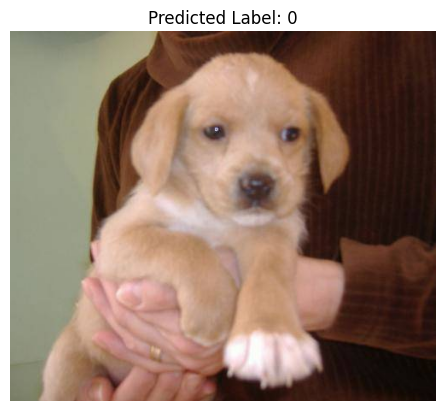

In [3]:

from PIL import Image 

import matplotlib.pyplot as plt

def predict_image(image_path, model, device):
    # Transform the image to tensor and normalize it
    transform = transforms.Compose([transforms.Grayscale(num_output_channels=3), 
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))])

    # Load and transform the image
    image = Image.open(image_path)
    transformed_image = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Move image to the same device as the model
    transformed_image = transformed_image.to(device=device)
    
    # Set model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        output = model(transformed_image)
        _, predicted = torch.max(output, 1)
    
    return predicted.item(), image

image_path = '/home/toe/Documents/Aladdin_Persson_Pytorch_Serie/07_Pytorch_How_to_build_custom_Datasets_for_Images/dataset/dogs/dog.103.jpg'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predicted_label, image = predict_image(image_path, model, device)

# Display the image and the prediction
plt.imshow(image)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')  # Hide axes


print(f'The predicted label for the image {image_path} is: {predicted_label}')